In [1]:
!pip uninstall -y pmdarima numpy


!pip install numpy==1.23.5  # You can try 1.24.3 or earlier if needed
!pip install pmdarima --no-binary :all:  # Forces fresh compile


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 146.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
numba 0.61.2 requires numpy<2.3,>=1.24, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.3/630.3 kB 9.0 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


In [2]:
# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import pandas as pd

!pip install statsmodels



!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd

import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df

,YEAR,MO,DY,PREC,SURF_PRESSSURE,MAX_TEMP,MIN_TEMP,RH,AVG_TEMP,SL_PRESSURE,CLOUD_COVER,WS10M,WD_sin,WD_cos,MONOSOON_SEASON_Northeast_Monsoon,MONOSOON_SEASON_Second_Inter_Monsoon,MONOSOON_SEASON_Southwest_Monsoon
Date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,2013,1,1,0.22,99.57,28.16,23.90,85.13,28.5,1009.2,5.0,3.99,0.600420,0.799685,True,False,False
2013-01-02 00:00:00,2013,1,2,1.09,99.65,27.65,23.41,86.19,27.6,1010.4,5.0,4.25,0.500000,0.866025,True,False,False
2013-01-03 00:00:00,2013,1,3,13.42,99.68,28.38,23.42,86.26,26.4,1011.0,8.0,4.75,0.439939,0.898028,True,False,False
2013-01-04 00:00:00,2013,1,4,8.79,99.65,27.58,22.93,86.31,25.1,1010.1,8.0,5.74,0.424199,0.905569,True,False,False
2013-01-05 00:00:00,2013,1,5,2.60,99.50,26.16,22.17,86.88,26.9,1007.5,8.0,5.79,0.563526,0.826098,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00,2023,12,27,9.45,99.66,30.35,24.40,88.57,29.5,1011.0,5.0,6.43,0.381070,0.924546,True,False,False
2023-12-28 00:00:00,2023,12,28,13.93,99.58,29.37,25.51,90.59,28.5,1010.9,7.0,3.93,0.634731,0.772734,True,False,False
2023-12-29 00:00:00,2023,12,29,9.80,99.69,29.30,25.03,89.03,28.2,1011.4,7.0,2.59,0.689620,0.724172,True,False,False


In [3]:
df.columns


Index(['YEAR', 'MO', 'DY', 'PREC', 'SURF_PRESSSURE', 'MAX_TEMP', 'MIN_TEMP',
       'RH', 'AVG_TEMP', 'SL_PRESSURE', 'CLOUD_COVER', 'WS10M', 'WD_sin',
       'WD_cos', 'MONOSOON_SEASON_Northeast_Monsoon',
       'MONOSOON_SEASON_Second_Inter_Monsoon',
       'MONOSOON_SEASON_Southwest_Monsoon'],
      dtype='object')

In [4]:
df['WS10M'] = df['WS10M'].astype(np.float32)


In [5]:
# Create 'Date' column using YEAR, MO, DY
df['Date'] = pd.to_datetime(dict(year=df['YEAR'], month=df['MO'], day=df['DY']))

# Set 'Date' as index
df = df.set_index('Date')

# Optional: drop original columns if you don’t need them anymore
# df.drop(columns=['YEAR', 'MO', 'DY'], inplace=True)

# Check result
print(df.index)
df.head()


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Date', length=4017, freq=None)


,YEAR,MO,DY,PREC,SURF_PRESSSURE,MAX_TEMP,MIN_TEMP,RH,AVG_TEMP,SL_PRESSURE,CLOUD_COVER,WS10M,WD_sin,WD_cos,MONOSOON_SEASON_Northeast_Monsoon,MONOSOON_SEASON_Second_Inter_Monsoon,MONOSOON_SEASON_Southwest_Monsoon
Date,,,,,,,,,,,,,,,,,
2013-01-01,2013,1,1,0.22,99.57,28.16,23.90,85.13,28.5,1009.2,5.0,3.99,0.600420,0.799685,True,False,False
2013-01-02,2013,1,2,1.09,99.65,27.65,23.41,86.19,27.6,1010.4,5.0,4.25,0.500000,0.866025,True,False,False
2013-01-03,2013,1,3,13.42,99.68,28.38,23.42,86.26,26.4,1011.0,8.0,4.75,0.439939,0.898028,True,False,False
2013-01-04,2013,1,4,8.79,99.65,27.58,22.93,86.31,25.1,1010.1,8.0,5.74,0.424199,0.905569,True,False,False
2013-01-05,2013,1,5,2.60,99.50,26.16,22.17,86.88,26.9,1007.5,8.0,5.79,0.563526,0.826098,True,False,False


In [6]:
# Create a date time index as Year-Month-day

import pandas as pd

# Count missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values for each column
print("Missing values in each column:")
print(missing_values)
df['Date'] = pd.to_datetime(dict(year=df['YEAR'], month=df['MO'], day=df['DY']))

#Year                                                      int64
#Month                                                     int64
#CPC Import Prices (C&F) (US$/bbl)(*)                     object
#Brent\n(Benchmark\nprice)                                object

df
# Create an interactive plot with plotly
fig = go.Figure()

# Add the line plot for 'Inflation' with date on x-axis and 'WS10M on y-axis
fig.add_trace(go.Scatter(x=df['Date'], y=df['WS10M'], mode='lines', name='Wind Speed', line=dict(color='blue')))

# Update layout
fig.update_layout(
    title='WS10M Time Series (2013-2023)',
    xaxis_title='Date',
    yaxis_title='WS10M (Index)',
    template='plotly_dark',  # Choose a template style for the plot
    xaxis=dict(tickangle=45),
    showlegend=True
)

# Show the interactive plot
fig.show()

Missing values in each column:
YEAR                                    0
MO                                      0
DY                                      0
PREC                                    0
SURF_PRESSSURE                          0
MAX_TEMP                                0
MIN_TEMP                                0
RH                                      0
AVG_TEMP                                0
SL_PRESSURE                             0
CLOUD_COVER                             0
WS10M                                   0
WD_sin                                  0
WD_cos                                  0
MONOSOON_SEASON_Northeast_Monsoon       0
MONOSOON_SEASON_Second_Inter_Monsoon    0
MONOSOON_SEASON_Southwest_Monsoon       0
dtype: int64


In [7]:
df.columns

Index(['YEAR', 'MO', 'DY', 'PREC', 'SURF_PRESSSURE', 'MAX_TEMP', 'MIN_TEMP',
       'RH', 'AVG_TEMP', 'SL_PRESSURE', 'CLOUD_COVER', 'WS10M', 'WD_sin',
       'WD_cos', 'MONOSOON_SEASON_Northeast_Monsoon',
       'MONOSOON_SEASON_Second_Inter_Monsoon',
       'MONOSOON_SEASON_Southwest_Monsoon', 'Date'],
      dtype='object')

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [9]:
df

,YEAR,MO,DY,PREC,SURF_PRESSSURE,MAX_TEMP,MIN_TEMP,RH,AVG_TEMP,SL_PRESSURE,CLOUD_COVER,WS10M,WD_sin,WD_cos,MONOSOON_SEASON_Northeast_Monsoon,MONOSOON_SEASON_Second_Inter_Monsoon,MONOSOON_SEASON_Southwest_Monsoon,Date
Date,,,,,,,,,,,,,,,,,,
2013-01-01,2013,1,1,0.22,99.57,28.16,23.90,85.13,28.5,1009.2,5.0,3.99,0.600420,0.799685,True,False,False,2013-01-01
2013-01-02,2013,1,2,1.09,99.65,27.65,23.41,86.19,27.6,1010.4,5.0,4.25,0.500000,0.866025,True,False,False,2013-01-02
2013-01-03,2013,1,3,13.42,99.68,28.38,23.42,86.26,26.4,1011.0,8.0,4.75,0.439939,0.898028,True,False,False,2013-01-03
2013-01-04,2013,1,4,8.79,99.65,27.58,22.93,86.31,25.1,1010.1,8.0,5.74,0.424199,0.905569,True,False,False,2013-01-04
2013-01-05,2013,1,5,2.60,99.50,26.16,22.17,86.88,26.9,1007.5,8.0,5.79,0.563526,0.826098,True,False,False,2013-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,2023,12,27,9.45,99.66,30.35,24.40,88.57,29.5,1011.0,5.0,6.43,0.381070,0.924546,True,False,False,2023-12-27
2023-12-28,2023,12,28,13.93,99.58,29.37,25.51,90.59,28.5,1010.9,7.0,3.93,0.634731,0.772734,True,False,False,2023-12-28
2023-12-29,2023,12,29,9.80,99.69,29.30,25.03,89.03,28.2,1011.4,7.0,2.59,0.689620,0.724172,True,False,False,2023-12-29


In [10]:
data=df.copy()

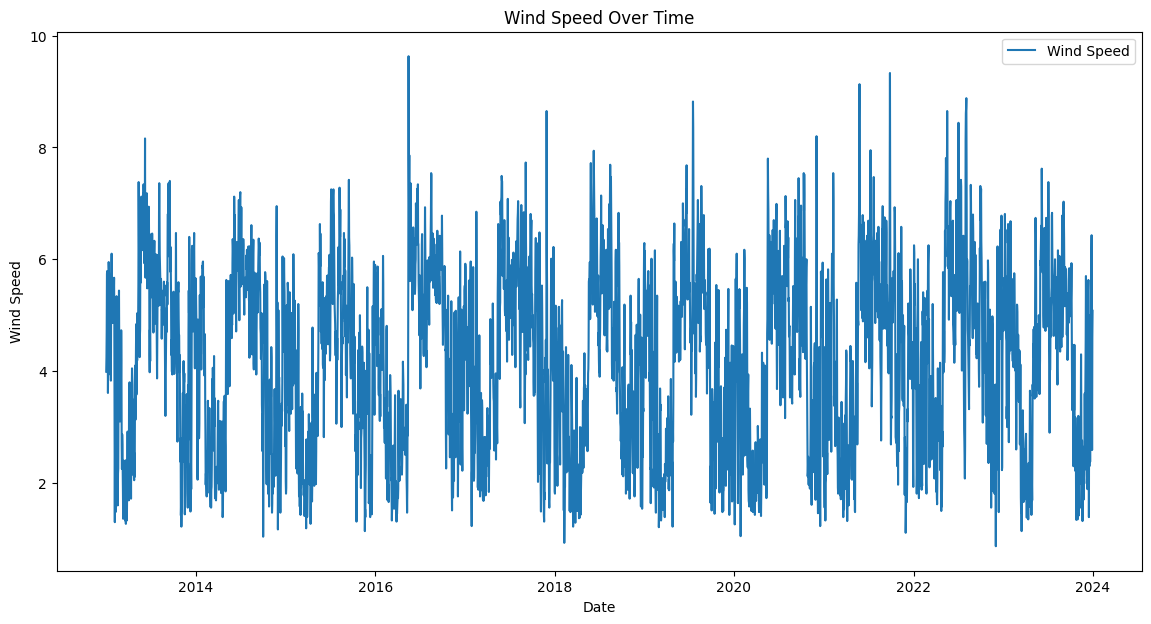

In [11]:
# Plotting the original Wind Speed
plt.figure(figsize=(14, 7))
plt.plot(data.index, data["WS10M"], label='Wind Speed')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

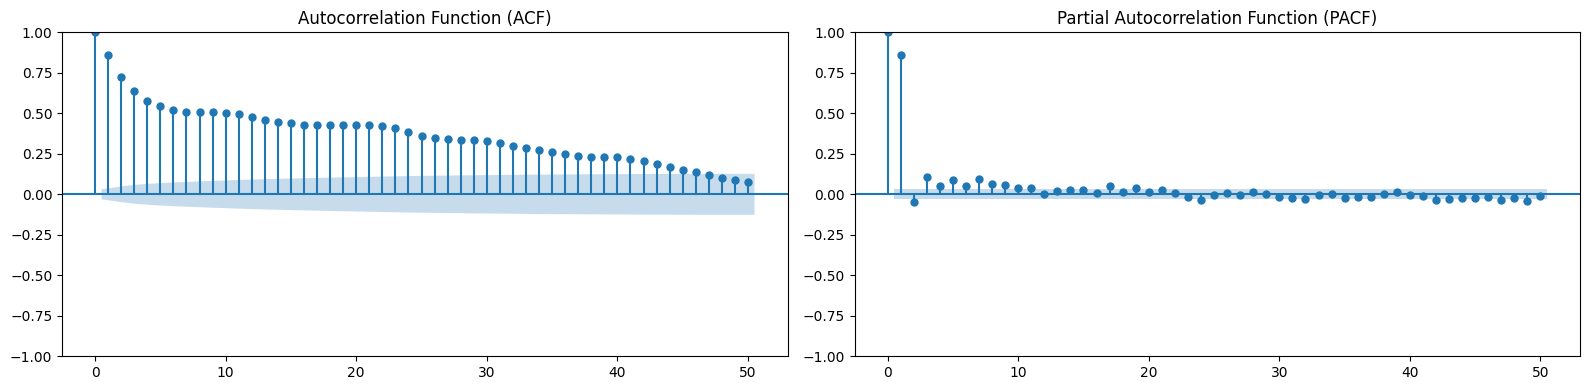

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(df['WS10M'].dropna(), lags=50, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['WS10M'].dropna(), lags=50, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [13]:
## 48 = ACF Plot MA
## 2= PACF plot AR

## Auto ARIMA

In [14]:
!pip install pmdarima


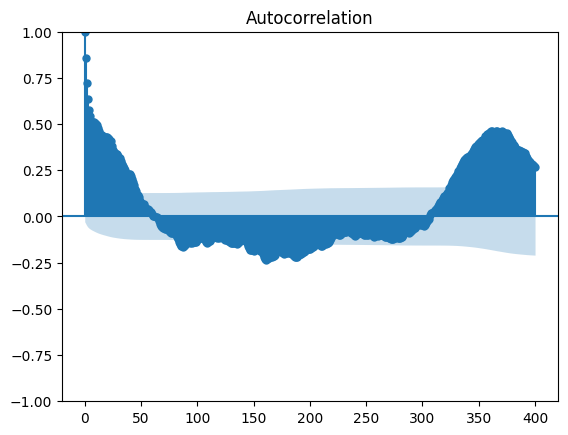

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["WS10M"].dropna(), lags=400)
plt.show()


## Seasonality Idenification

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import periodogram
import plotly.graph_objects as go

# Set random seed
np.random.seed(42)

# Get signal and sampling rate
y = df["WS10M"].dropna()
freqs, psd = periodogram(y)

# Avoid division by zero
periods = 1 / freqs[1:]
psd_values = psd[1:]

# Create interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=periods,
    y=psd_values,
    mode='lines',
    name='Periodogram',
    line=dict(color='royalblue')
))

fig.update_layout(
    title='Interactive Periodogram (1/frequency = periodicity in time)',
    xaxis_title='Seasonal Period (days)',
    yaxis_title='Power Spectral Density',
    xaxis_type='linear',
    yaxis_type='linear',
    template='plotly_white',
    hovermode='x unified'
)

fig.show()


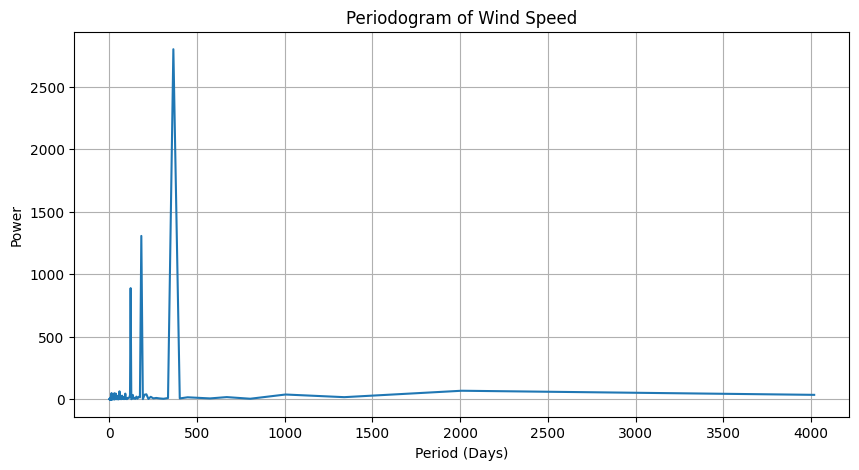

In [ ]:
#121
#182
#365
from scipy.signal import periodogram

y = df["WS10M"].dropna()
freqs, power = periodogram(y)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(1 / freqs[1:], power[1:])  # 1/frequency gives the period in days
plt.title("Periodogram of Wind Speed")
plt.xlabel("Period (Days)")
plt.ylabel("Power")
plt.grid(True)
plt.show()



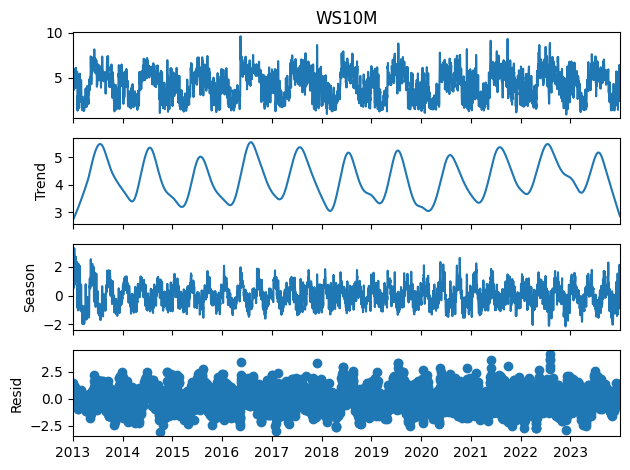

Seasonality Strength: 0.399


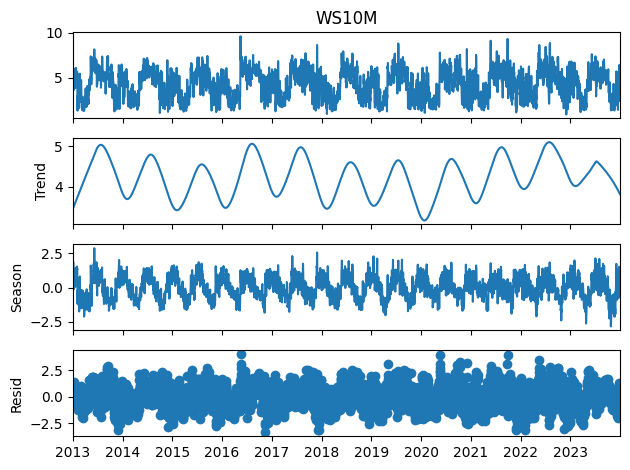

Seasonality Strength: 0.406


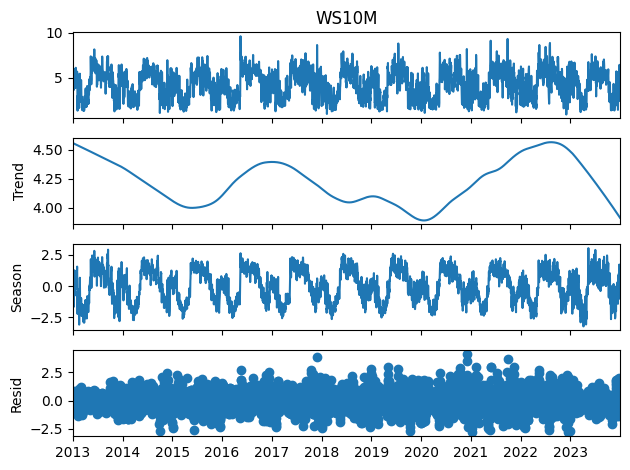

Seasonality Strength: 0.692


In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(df["WS10M"], period=121)  # Use 7 for weekly, 365 for yearly
res = stl.fit()
res.plot()
plt.show()

seasonal = res.seasonal
resid = res.resid

strength = 1 - np.var(resid) / np.var(resid + seasonal)
print(f"Seasonality Strength: {strength:.3f}")

from statsmodels.tsa.seasonal import STL

stl = STL(df["WS10M"], period=182)  # Use 7 for weekly, 365 for yearly
res = stl.fit()
res.plot()
plt.show()

seasonal = res.seasonal
resid = res.resid

strength = 1 - np.var(resid) / np.var(resid + seasonal)
print(f"Seasonality Strength: {strength:.3f}")

from statsmodels.tsa.seasonal import STL

stl = STL(df["WS10M"], period=365)  # Use 7 for weekly, 365 for yearly
res = stl.fit()
res.plot()
plt.show()

seasonal = res.seasonal
resid = res.resid

strength = 1 - np.var(resid) / np.var(resid + seasonal)
print(f"Seasonality Strength: {strength:.3f}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[121] intercept   : AIC=inf, Time=341.64 sec
 ARIMA(0,0,0)(0,0,0)[121] intercept   : AIC=12089.836, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[121] intercept   : AIC=7661.871, Time=120.39 sec
 ARIMA(0,0,1)(0,0,1)[121] intercept   : AIC=9544.408, Time=46.95 sec
 ARIMA(0,0,0)(0,0,0)[121]             : AIC=18769.542, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[121] intercept   : AIC=7661.251, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[121] intercept   : AIC=7661.850, Time=45.50 sec
 ARIMA(1,0,0)(1,0,1)[121] intercept   : AIC=inf, Time=115.17 sec
 ARIMA(2,0,0)(0,0,0)[121] intercept   : AIC=7656.356, Time=0.19 sec
 ARIMA(2,0,0)(1,0,0)[121] intercept   : AIC=7656.527, Time=134.53 sec
 ARIMA(2,0,0)(0,0,1)[121] intercept   : AIC=7656.491, Time=60.84 sec
 ARIMA(2,0,0)(1,0,1)[121] intercept   : AIC=inf, Time=170.13 sec
 ARIMA(3,0,0)(0,0,0)[121] intercept   : AIC=7621.791, Time=0.26 sec
 ARIMA(3,0,0)(1,0,0)[121] intercept   : AIC=7621.858, Time=153.55 sec
 AR

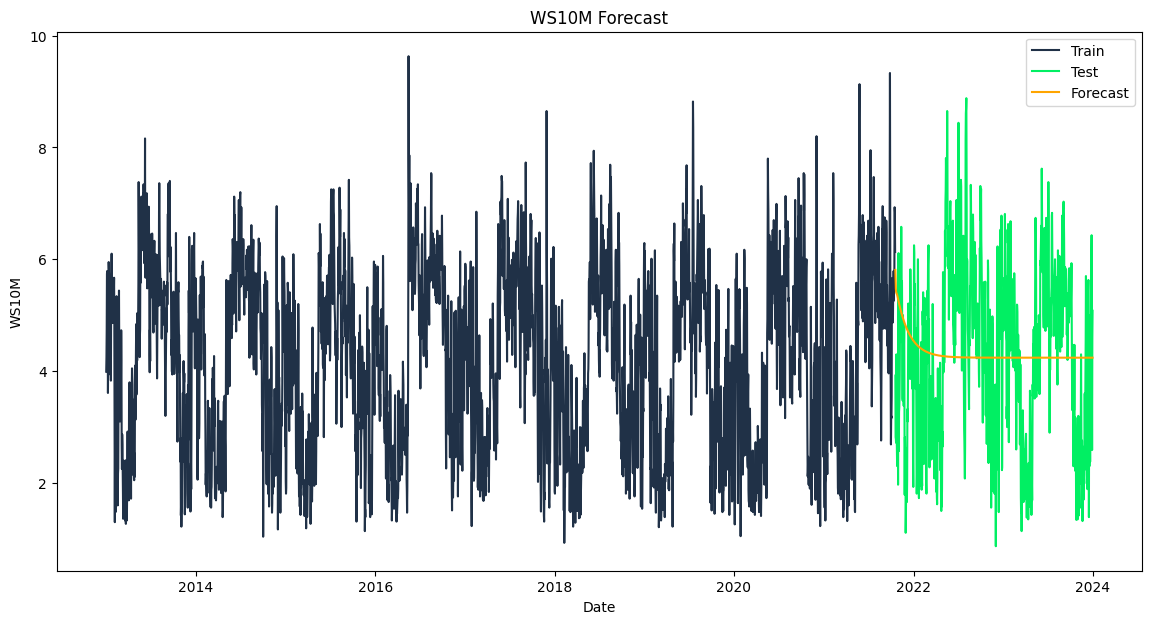

AIC: 7514.9873
BIC: 7563.5870
MSE: 2.5413
MAE: 1.3323
MAPE: 41.1470%
RMSE: 1.5941


7547

In [15]:
from pickle import TRUE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import gc  # Import garbage collector

# Assuming 'df' is your DataFrame and 'WS10M' is the target column
# Split data into train and test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Use AutoARIMA to find the best ARIMA model
auto_model = auto_arima(
    train["WS10M"],  # Training data
    seasonal=True,
    m=121,  # Seasonal periodicity
    trace=True,       # Print logs to see the search process
    error_action="ignore",  # Ignore invalid parameter combinations
    suppress_warnings=True,  # Suppress warnings
    stepwise=True,    # Use stepwise algorithm for faster search
    information_criterion='aic'  # Use AIC to select the best model
)

# Print the best model summary
print(auto_model.summary())

# Forecast using the best model
forecast = auto_model.predict(n_periods=len(test))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train.index, train["WS10M"], label='Train', color='#203147')
plt.plot(test.index, test["WS10M"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('WS10M Forecast')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.show()

# Calculate metrics
mse = mean_squared_error(test["WS10M"], forecast)
mae = mean_absolute_error(test["WS10M"], forecast)
mape = np.mean(np.abs((test["WS10M"] - forecast) / test["WS10M"])) * 100
rmse = np.sqrt(mse)

# Print metrics
print(f"AIC: {auto_model.aic():.4f}")
print(f"BIC: {auto_model.bic():.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"RMSE: {rmse:.4f}")

# 🔄 Step 4: Free Memory Between Models
del auto_model, forecast, train, test, mse, mae, mape, rmse
gc.collect()


In [1]:
auto_model

NameError: name 'auto_model' is not defined

In [ ]:
#121
#182
#365

In [ ]:
from pickle import TRUE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'df' is your DataFrame and 'WS10M' is the target column
# Split data into train and test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Use AutoARIMA to find the best ARIMA model
auto_model = auto_arima(
    train["WS10M"],  # Training data
    seasonal=True ,
    m=182, # Disable seasonal component (set to True if you have seasonality)
    trace=True,       # Print logs to see the search process
    error_action="ignore",  # Ignore invalid parameter combinations
    suppress_warnings=True, # Suppress warnings
    stepwise=True,    # Use stepwise algorithm for faster search
    information_criterion='aic'  # Use AIC to select the best model
)

# Print the best model summary
print(auto_model.summary())

# Forecast using the best model
forecast = auto_model.predict(n_periods=len(test))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train.index, train["WS10M"], label='Train', color='#203147')
plt.plot(test.index, test["WS10M"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('WS10M Forecast')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.show()

# Calculate metrics
mse = mean_squared_error(test["WS10M"], forecast)
mae = mean_absolute_error(test["WS10M"], forecast)
mape = np.mean(np.abs((test["WS10M"] - forecast) / test["WS10M"])) * 100
rmse = np.sqrt(mse)

# Print metrics
print(f"AIC: {auto_model.aic():.4f}")
print(f"BIC: {auto_model.bic():.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"RMSE: {rmse:.4f}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[182] intercept   : AIC=inf, Time=752.13 sec
 ARIMA(0,0,0)(0,0,0)[182] intercept   : AIC=12089.836, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[182] intercept   : AIC=7662.788, Time=257.08 sec
 ARIMA(0,0,1)(0,0,1)[182] intercept   : AIC=9533.676, Time=94.95 sec
 ARIMA(0,0,0)(0,0,0)[182]             : AIC=18769.542, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[182] intercept   : AIC=7661.251, Time=0.13 sec
 ARIMA(1,0,0)(0,0,1)[182] intercept   : AIC=7662.785, Time=119.41 sec
 ARIMA(1,0,0)(1,0,1)[182] intercept   : AIC=inf, Time=559.43 sec
 ARIMA(2,0,0)(0,0,0)[182] intercept   : AIC=7656.356, Time=0.19 sec
 ARIMA(2,0,0)(1,0,0)[182] intercept   : AIC=7657.721, Time=248.60 sec
 ARIMA(2,0,0)(0,0,1)[182] intercept   : AIC=7657.720, Time=198.55 sec
 ARIMA(2,0,0)(1,0,1)[182] intercept   : AIC=inf, Time=669.66 sec
 ARIMA(3,0,0)(0,0,0)[182] intercept   : AIC=7621.791, Time=0.26 sec
 ARIMA(3,0,0)(1,0,0)[182] intercept   : AIC=7623.483, Time=332.38 sec
 

In [ ]:
from pickle import TRUE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'df' is your DataFrame and 'WS10M' is the target column
# Split data into train and test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Use AutoARIMA to find the best ARIMA model
auto_model = auto_arima(
    train["WS10M"],  # Training data
    seasonal=True ,
    m=365, # Disable seasonal component (set to True if you have seasonality)
    trace=True,       # Print logs to see the search process
    error_action="ignore",  # Ignore invalid parameter combinations
    suppress_warnings=True, # Suppress warnings
    stepwise=True,    # Use stepwise algorithm for faster search
    information_criterion='aic'  # Use AIC to select the best model
)

# Print the best model summary
print(auto_model.summary())

# Forecast using the best model
forecast = auto_model.predict(n_periods=len(test))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train.index, train["WS10M"], label='Train', color='#203147')
plt.plot(test.index, test["WS10M"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('WS10M Forecast')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.show()

# Calculate metrics
mse = mean_squared_error(test["WS10M"], forecast)
mae = mean_absolute_error(test["WS10M"], forecast)
mape = np.mean(np.abs((test["WS10M"] - forecast) / test["WS10M"])) * 100
rmse = np.sqrt(mse)

# Print metrics
print(f"AIC: {auto_model.aic():.4f}")
print(f"BIC: {auto_model.bic():.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"RMSE: {rmse:.4f}")

## Combination of Values

In [ ]:
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the range for (p, d, q) and (P, D, Q)
p_values = range(0, 4)  # p from 0 to 5
d_values = range(0, 2)  # d from 0 to 3
q_values = range(0, 4)  # q from 0 to 5

P_values = range(0, 4)  # P from 0 to 5
D_values = range(0, 2)  # D from 0 to 3
Q_values = range(0, 4)  # Q from 0 to 5

m = 365  # Seasonal period (e.g., daily seasonality with yearly cycle)

# Store results
results = []

# Iterate over all combinations of (p, d, q) and (P, D, Q)
for p, d, q, P, D, Q in itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values):
    try:
        # Fit SARIMA model
        model = SARIMAX(
            train["WS10M"],
            order=(p, d, q),
            seasonal_order=(P, D, Q, m),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        model_fit = model.fit(disp=False)

        # Forecast
        forecast = model_fit.forecast(steps=len(test))

        # Calculate metrics
        mse = mean_squared_error(test["WS10M"], forecast)
        mae = mean_absolute_error(test["WS10M"], forecast)
        mape = np.mean(np.abs((test["WS10M"] - forecast) / test["WS10M"])) * 100
        rmse = np.sqrt(mse)

        # Store results
        results.append({
            'p': p, 'd': d, 'q': q,
            'P': P, 'D': D, 'Q': Q,
            'AIC': model_fit.aic,
            'BIC': model_fit.bic,
            'MSE': mse,
            'MAE': mae,
            'MAPE': mape,
            'RMSE': rmse
        })
    except:
        continue  # Skip combinations that fail

# Convert results to a DataFrame
results_df = pd.DataFrame(results)



In [ ]:
results_df

In [ ]:
# Sort by AIC (lower is better)
results_df = results_df.sort_values(by='AIC')

# Display the best SARIMA parameters
print("Best SARIMA Model:")
print(results_df.head(1))

# Print top results
print(results_df)


In [ ]:
# Sort by AIC (lower is better)
results_df = results_df.sort_values(by='AIC')
best_model_1=results_df.head(1)
best_model_2=results_df.head(2)
# Display the best SARIMA parameters
print("Best SARIMA Model:")
print(results_df.head(1))

# Print top results
print(results_df)

In [ ]:
# Fit the best two models
best_p1, best_d1, best_q1 = best_model_1["p"], best_model_1["d"], best_model_1["q"]
best_p2, best_d2, best_q2 = best_model_2["p"], best_model_2["d"], best_model_2["q"]

# Fit ARIMA models
model_1 = ARIMA(train["WS10M"], order=(best_p1, best_d1, best_q1)).fit()
model_2 = ARIMA(train["WS10M"], order=(best_p2, best_d2, best_q2)).fit()

# Forecast
forecast_1 = model_1.forecast(steps=len(test))
forecast_2 = model_2.forecast(steps=len(test))

# Plot the results for Best Model 1
plt.figure(figsize=(14, 7))
plt.plot(train.index, train["WS10M"], label='Train', color='#203147')
plt.plot(test.index, test["WS10M"], label='Test', color='#01ef63')
plt.plot(test.index, forecast_1, label=f'Forecast (Best Model 1: ARIMA({best_p1},{best_d1},{best_q1}))', color='orange')
plt.title(f'WS10M Forecast - Best Model 1: ARIMA({best_p1},{best_d1},{best_q1})')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.show()

# Plot the results for Best Model 2
plt.figure(figsize=(14, 7))
plt.plot(train.index, train["WS10M"], label='Train', color='#203147')
plt.plot(test.index, test["WS10M"], label='Test', color='#01ef63')
plt.plot(test.index, forecast_2, label=f'Forecast (Best Model 2: ARIMA({best_p2},{best_d2},{best_q2}))', color='red')
plt.title(f'WS10M Forecast - Best Model 2: ARIMA({best_p2},{best_d2},{best_q2})')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.show()


## Research Paper

(4,0,0)(0,0,1)[144]


Wind speed forecasting using univariate and multivariate time series models





In [ ]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define SARIMA parameters from research paper
p, d, q = 4, 0, 0
P, D, Q, m = 0, 0, 1, 144  # Seasonal period of 144

# Fit SARIMA model
sarima_model = SARIMAX(
    train["WS10M"],
    order=(p, d, q),
    seasonal_order=(P, D, Q, m),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_fit = sarima_model.fit(disp=False)

# Forecast
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Calculate metrics
mse = mean_squared_error(test["WS10M"], sarima_forecast)
mae = mean_absolute_error(test["WS10M"], sarima_forecast)
mape = np.mean(np.abs((test["WS10M"] - sarima_forecast) / test["WS10M"])) * 100
rmse = np.sqrt(mse)

# Store results
sarima_results = {
    'Model': f'SARIMA({p},{d},{q})({P},{D},{Q})[{m}]',
    'AIC': sarima_fit.aic,
    'BIC': sarima_fit.bic,
    'MSE': mse,
    'MAE': mae,
    'MAPE': mape,
    'RMSE': rmse
}

# Display results
print("SARIMA Model Results:")
print(sarima_results)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(train.index, train["WS10M"], label='Train', color='#203147')
plt.plot(test.index, test["WS10M"], label='Test', color='#01ef63')
plt.plot(test.index, sarima_forecast, label=f'Forecast: SARIMA({p},{d},{q})({P},{D},{Q})[{m}]', color='red')
plt.title(f'WS10M Forecast - SARIMA({p},{d},{q})({P},{D},{Q})[{m}]')
plt.xlabel('Date')
plt.ylabel('WS10M')
plt.legend()
plt.show()
